# US Educational Finance
## ( Simple Linear Regression)

Context
The United States Census Bureau conducts annual surveys to assess the finances of elementary and high schools. The attached CSV file contains a summary of revenue and expenditure for the years 1992-2015, organized by state.

### Problem Statement

Build a model which will examine the relationship between total expenditure and Total Revenue (which is money spent on building, busses, etc. based on the money spent on different platforms for marketing.)

In [0]:
#Upload a file from your local machine
from google.colab import files
uploaded = files.upload()

Saving elsect_summary.csv to elsect_summary.csv


## Reading and Understanding the Data

In [0]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [0]:
advertising = pd.DataFrame(pd.read_csv("elsect_summary.csv"))
advertising.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,Alabama,1992,NaN,2678885,304177,1659028,715680,2653798,1481703,735036,NaN,174053
1,Alaska,1992,NaN,1049591,106780,720711,222100,972488,498362,350902,NaN,37451
2,Arizona,1992,NaN,3258079,297888,1369815,1590376,3401580,1435908,1007732,NaN,609114
3,Arkansas,1992,NaN,1711959,178571,958785,574603,1743022,964323,483488,NaN,145212
4,California,1992,NaN,26260025,2072470,16546514,7641041,27138832,14358922,8520926,NaN,2044688


## Data Inspection

In [0]:
advertising.shape

(1224, 12)

In [0]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 12 columns):
STATE                           1224 non-null object
YEAR                            1224 non-null int64
ENROLL                          1173 non-null float64
TOTAL_REVENUE                   1224 non-null int64
FEDERAL_REVENUE                 1224 non-null int64
STATE_REVENUE                   1224 non-null int64
LOCAL_REVENUE                   1224 non-null int64
TOTAL_EXPENDITURE               1224 non-null int64
INSTRUCTION_EXPENDITURE         1224 non-null int64
SUPPORT_SERVICES_EXPENDITURE    1224 non-null int64
OTHER_EXPENDITURE               1173 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1224 non-null int64
dtypes: float64(2), int64(9), object(1)
memory usage: 114.8+ KB


In [0]:
advertising.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
count,1224.000000,1.173000e+03,1.224000e+03,1.224000e+03,1.224000e+03,1.224000e+03,1.224000e+03,1.224000e+03,1.224000e+03,1.173000e+03,1.224000e+03
mean,2003.500000,9.160265e+05,8.924060e+06,7.555382e+05,4.139964e+06,4.028558e+06,9.037118e+06,4.674538e+06,2.631397e+06,4.231043e+05,8.944065e+05
std,6.925016,1.063425e+06,1.146065e+07,1.134900e+06,5.399466e+06,5.342740e+06,1.172569e+07,6.139830e+06,3.282216e+06,5.248700e+05,1.319977e+06
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04
25%,1997.750000,2.629350e+05,2.178702e+06,1.872205e+05,1.134351e+06,7.102645e+05,2.154830e+06,1.146924e+06,6.258090e+05,1.005860e+05,1.783398e+05
50%,2003.500000,6.480840e+05,5.031386e+06,3.979885e+05,2.491838e+06,2.027902e+06,5.134935e+06,2.606185e+06,1.513362e+06,2.691570e+05,4.972200e+05
75%,2009.250000,1.009200e+06,1.062036e+07,8.165382e+05,4.833075e+06,4.683521e+06,1.057543e+07,5.521131e+06,3.129162e+06,5.105030e+05,9.633838e+05
max,2015.000000,6.307022e+06,7.824804e+07,9.990221e+06,4.318764e+07,3.494151e+07,7.836596e+07,4.195426e+07,2.350185e+07,3.759373e+06,1.022366e+07


## Data Cleaning

In [0]:
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]
# There are no NULL values in the dataset, hence it is clean.

STATE                           0.000000
YEAR                            0.000000
ENROLL                          4.166667
TOTAL_REVENUE                   0.000000
FEDERAL_REVENUE                 0.000000
STATE_REVENUE                   0.000000
LOCAL_REVENUE                   0.000000
TOTAL_EXPENDITURE               0.000000
INSTRUCTION_EXPENDITURE         0.000000
SUPPORT_SERVICES_EXPENDITURE    0.000000
OTHER_EXPENDITURE               4.166667
CAPITAL_OUTLAY_EXPENDITURE      0.000000
dtype: float64

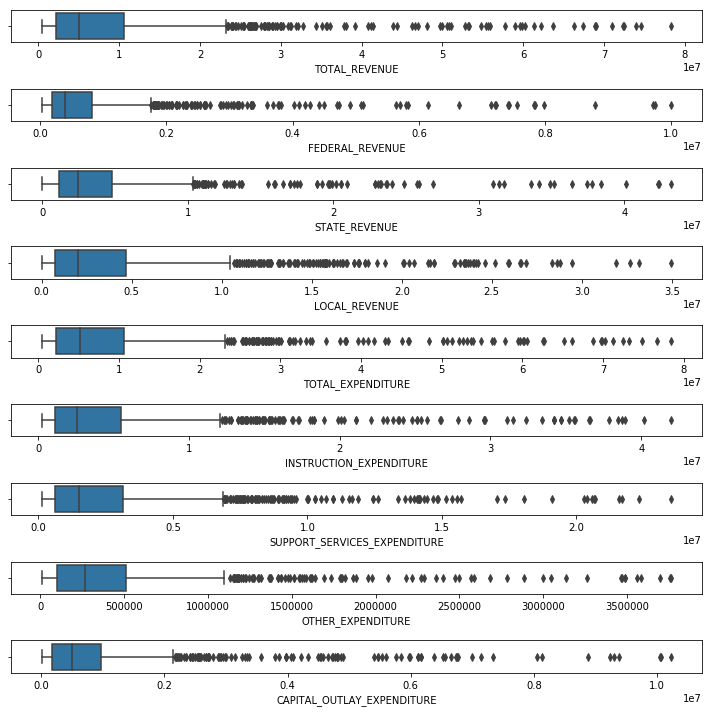

In [0]:
# Outlier Analysis
fig, axs = plt.subplots(9, figsize = (10,10))
plt1 = sns.boxplot(advertising['TOTAL_REVENUE'], ax = axs[0])
plt2 = sns.boxplot(advertising['FEDERAL_REVENUE'], ax = axs[1])
plt3 = sns.boxplot(advertising['STATE_REVENUE'], ax = axs[2])
plt4 = sns.boxplot(advertising['LOCAL_REVENUE'], ax = axs[3])
plt5 = sns.boxplot(advertising['TOTAL_EXPENDITURE'], ax = axs[4])
plt6 = sns.boxplot(advertising['INSTRUCTION_EXPENDITURE'], ax = axs[5])
plt7 = sns.boxplot(advertising['SUPPORT_SERVICES_EXPENDITURE'], ax = axs[6])
plt8 = sns.boxplot(advertising['OTHER_EXPENDITURE'], ax = axs[7])
plt9 = sns.boxplot(advertising['CAPITAL_OUTLAY_EXPENDITURE'], ax = axs[8])
plt.tight_layout()
plt.show()


In [0]:
# There are considerable outliers present in the data.

## Exploratory Data Analysis

### Univariate Analysis

#### Total_Expenditure  (Target Variable)

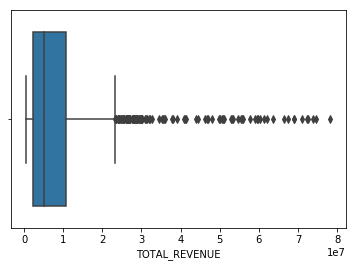

In [0]:
sns.boxplot(advertising['TOTAL_EXPENDITURE'])
plt.show()

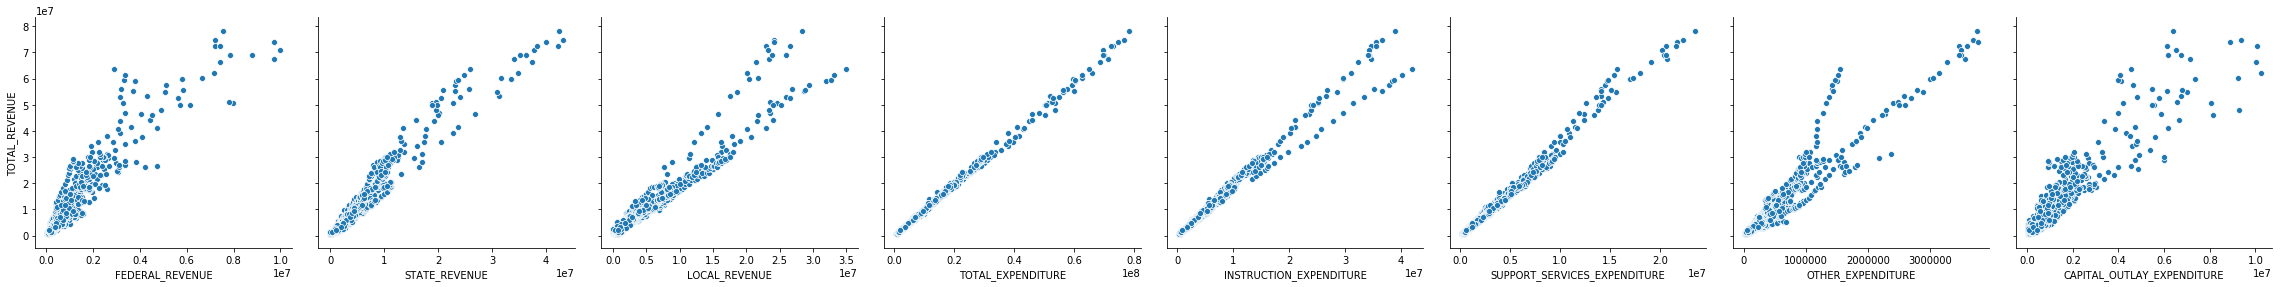

In [0]:
# Let's see how Total Revenue is related with other variables using scatter plot.
sns.pairplot(advertising, x_vars=['FEDERAL_REVENUE','STATE_REVENUE'                   
,'LOCAL_REVENUE'                   
,'TOTAL_EXPENDITURE'               
,'INSTRUCTION_EXPENDITURE'         
,'SUPPORT_SERVICES_EXPENDITURE'    
,'OTHER_EXPENDITURE'               
,'CAPITAL_OUTLAY_EXPENDITURE'], y_vars='TOTAL_REVENUE', height=4, aspect=1, kind='scatter')
plt.show()

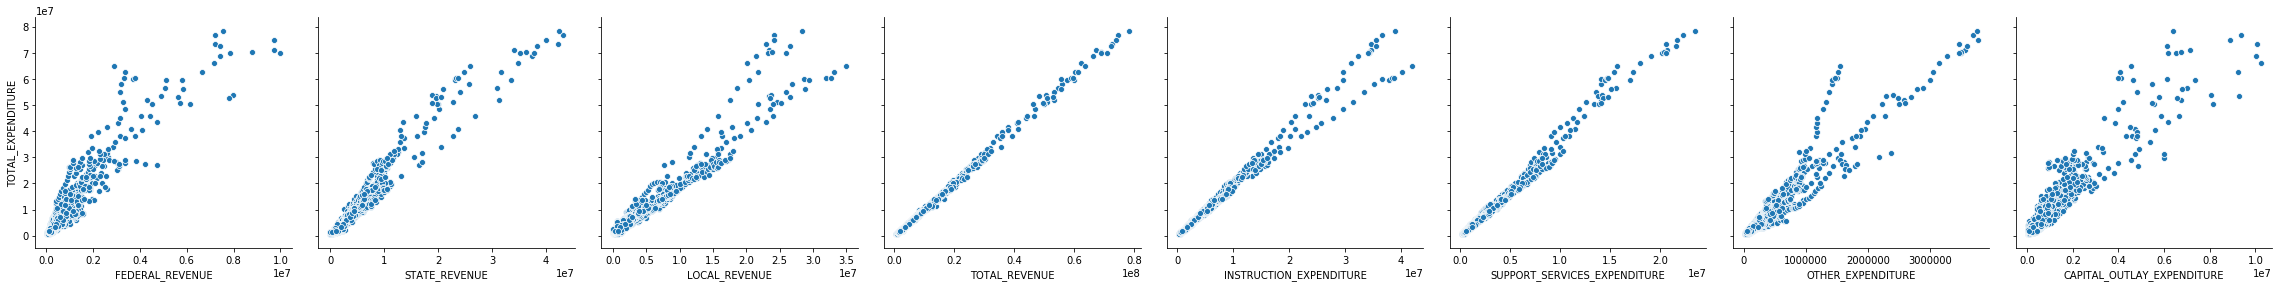

In [0]:
# Let's see how Total Expenditure is related with other variables using scatter plot.
sns.pairplot(advertising, x_vars=['FEDERAL_REVENUE','STATE_REVENUE'                   
,'LOCAL_REVENUE'                   
,'TOTAL_REVENUE'               
,'INSTRUCTION_EXPENDITURE'         
,'SUPPORT_SERVICES_EXPENDITURE'    
,'OTHER_EXPENDITURE'               
,'CAPITAL_OUTLAY_EXPENDITURE'], y_vars='TOTAL_EXPENDITURE', height=4, aspect=1, kind='scatter')
plt.show()

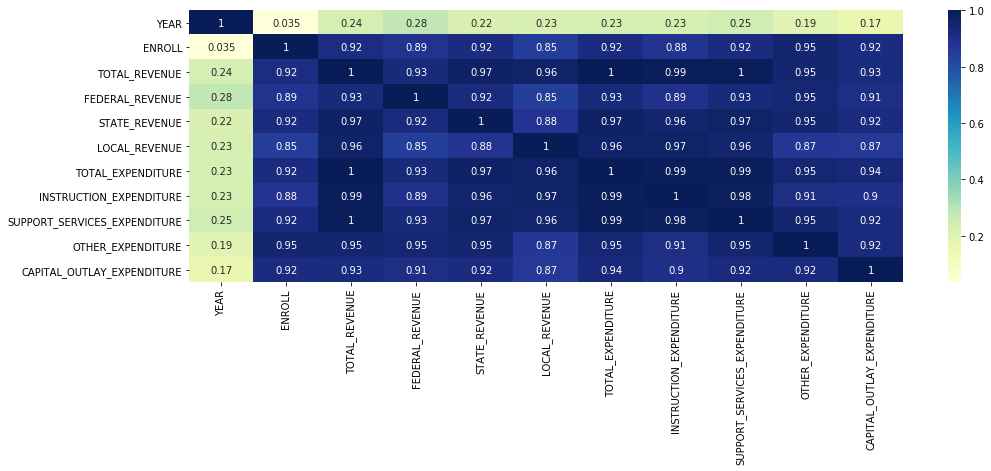

In [0]:
# Let's see the correlation between different variables.

#fig, ax = plt.subplots(figsize=(10,10))   
plt.figure(figsize=(16,5))
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)

plt.show()

As is visible from the pairplot and the heatmap, the variable `TOTAL_Expenditure` seems to be most correlated with `TOTAL_REVENUE`. So let's go ahead and perform simple linear regression using `` as our feature variable.

## Model Building

### Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times Total Revenue

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `Total_Revenuue`, in this case, to the variable `X` and the response variable, `Total_Expenditure`, to the variable `y`.

In [0]:
X = advertising['TOTAL_REVENUE']
y = advertising['TOTAL_EXPENDITURE']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [0]:
# Let's now take a look at the train dataset

X_train.head()

454      8911426
546      4370415
1035     6262807
837     14633578
521      1889600
Name: TOTAL_REVENUE, dtype: int64

In [0]:
y_train.head()

454      9154676
546      4467944
1035     6256926
837     14631545
521      1436637
Name: TOTAL_EXPENDITURE, dtype: int64

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [0]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [0]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [0]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const           -96528.919247
TOTAL_REVENUE        1.022548
dtype: float64

In [0]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      TOTAL_EXPENDITURE   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.789e+05
Date:                Wed, 24 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:36:09   Log-Likelihood:                -12478.
No. Observations:                 856   AIC:                         2.496e+04
Df Residuals:                     854   BIC:                         2.497e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.653e+04   2.24e+04     -4.303

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for TOTAL_REVENUE is 1.022, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.998
Meaning that 99.8% of the variance in `Total expenditure` is explained by `Total revenue`

This is a decent R-squared value.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ T_E = -96528.919247 + 1.022548 \times T_R $



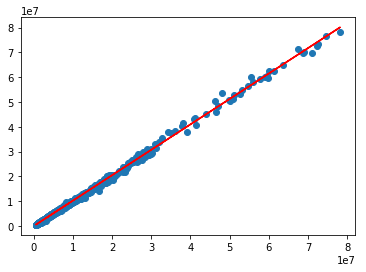

In [0]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 96528.919247 + 1.022548*X_train, 'r')
plt.show()

## Model Evaluation

### Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [0]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

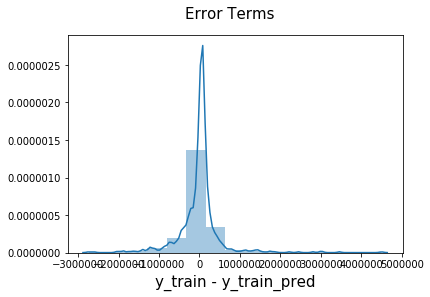

In [0]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

#### Looking for patterns in the residuals

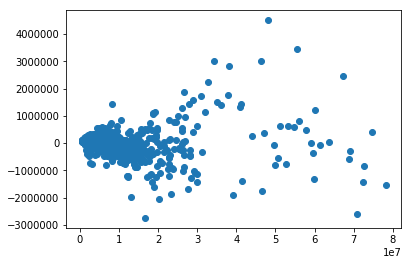

In [0]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

### Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [0]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [0]:
y_pred.head()

596    1.832850e+07
432    2.708611e+06
318    1.243991e+06
629    5.154523e+06
389    3.080014e+07
dtype: float64

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [0]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

480539.2393140746

###### Checking the R-squared on the test set

In [0]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9977958210487528

##### Visualizing the fit on the test set

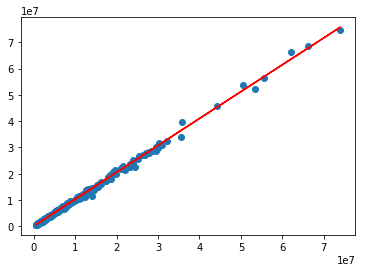

In [0]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 96528.919247 + 1.022548 * X_test, 'r')
plt.show()